# Week 16 - Learning from a dataset

As the final workshop in this module, this week's workshop will be a free-form exercise.

The goal of Machine Learning is to construct predictive models from data (= samples represented by their features), in a way that:
- groups the data by discovering the structure of the data (**clustering**)
- we are able to predict an unknown feature for a new, unseen sample (**supervised learning**)
    - if this feature is a real-valued, numerical feature, we talk about **regression**
    - if this feature is a categorical feature, describing some _type_ of our sample, we talk about **classification**
- if the model is able to predict actions of an agent in a dynamic environment, we talk about **reinforcement learning**.

The type of ML approaches mostly covered in this module all fall under the **supervised learning** paradigm. Supervised learning approaches to ML are **data driven**, in the sense that the predictive models are constructed by learning from (many) examples.

Your task for today's workshop will therefore be to pick and download a supervised learning (classification or regression) dataset from [a dataset repository](https://archive-beta.ics.uci.edu/datasets) (or the older version [of the same repository](https://archive.ics.uci.edu/ml/datasets.php)), find the best performing ML approach for the dataset, and train a predictive model.

## Chosing and cleaning a dataset

Take care that you may need to "clean" the dataset of your choice: check for missing values, make sure it has been loaded in the correct format (i.e. some datasets use different delimiters, some have header lines and some do not, can rely on different file types...).

You will also need to **handle the different types of data** if they are present in the dataset. As most algorithms implemented in `sklearn` are implemented for _numerical_ data, you should represent all of your features as numerical:
- **real-valued** numerical values can be left as-is
- **categorical** values should be one-hot encoded. This will transform a single feature column in a dataset with $n$ categorical values (e.g. blood type can be A, B, AB or O (n=4)) into $n$ indicator features (one column indicating if the blood type of the patient is A; one column for B, one column for AB and one for O. For this, you can check out [`pandas.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) or [`sklearn.preprocessing.OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- **ordinal** values fall between the above two categories. They might sometimes be expressed as numbers (user rating 1-5) or as categories ('low' 'mid' 'high'); however they _can be ordered and compared_. These should be left as-is if they are already represented as numbers, or encoded as numbers ('low' -> 0, 'mid' -> 1, 'high' -> 2) if expressed as categories.

You should also check the **scale** of all the features. Some ML approaches benefit from normalised data, while some do not care about the scale. Check the scale of all your features (the difference between the lowest and highest value for each feature). Especially if the scales are vastly different, consider:
- **normalising** the data (i.e. forcing the feature into a 0-1 range)
- **zero-centering** the data (i.e. after normalisation, forcing the data to have a median at zero)
- for these purposes you can check out [`sklearn.preprocessing.StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Here is a list of some datasets I have used this year, but feel free to pick a different one from the repository (or anywhere else):
- presence of [amphibian species](https://archive.ics.uci.edu/ml/datasets/Amphibians) along planned roadways (multi class classification)
- quality of [Portugeese wines](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) (classification)
- presence of [forest fires in Algeria](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++) (classification)
- distinguishing between varieties of [dried beans](https://archive.ics.uci.edu/ml/datasets/dry+bean+dataset) (classification)
- [heart desease](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Heart%29) dataset (classification)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>, <Axes: >]], dtype=object)

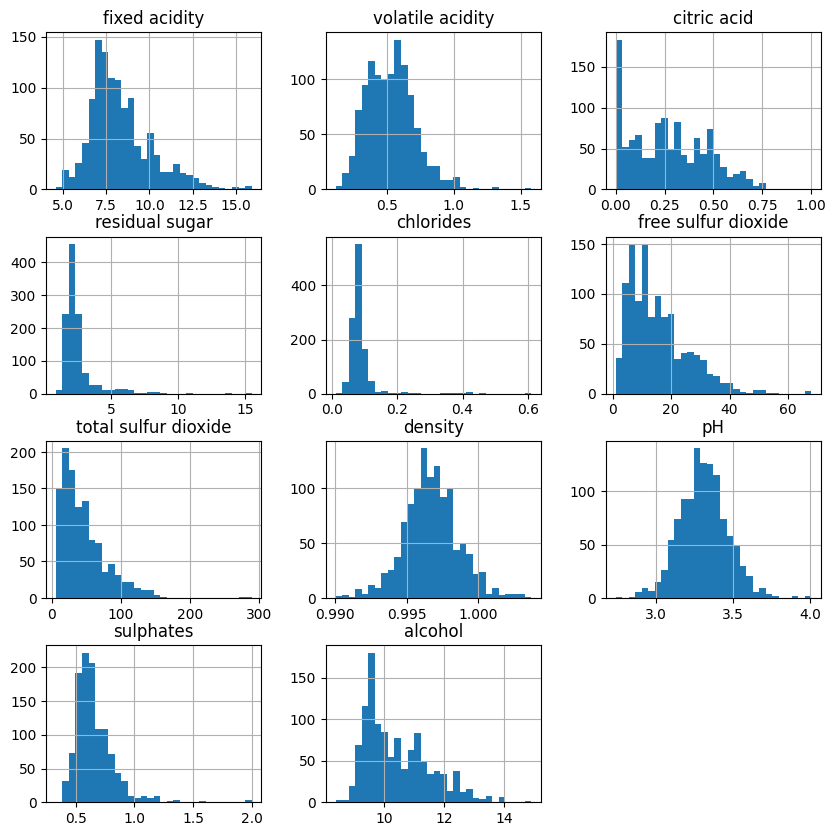

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('WineQT.csv')
#df.head()

# looks like id column is not needed, its simply just the row number
df = df.drop('Id', axis=1)

# Check for missing values in data frame
print(df.isnull().sum())

df.head()
df.shape

# For our problem we will look at a binary classification problem, so if the quality is greater then 5 (high quality)
# we will label it as 1, otherwise 0 (low quality)
features = df.drop('quality', axis=1)
target = df['quality'].apply(lambda x: 1 if x > 5 else 0)

# Looks like we dont need to do any data cleaning, all values are present and in the correct format
# Also all values are numeric, so no need to convert any categorical data

# Lets look at the distribution of the data
features.hist(bins=30, figsize=(10,10))
# We can see the data has many different scales, and some features are skewed (not normally distributed)
# So we will need to standardize the training and test data

## Chosing the model and the parameters

Compare the performance of different ML models on your dataset (e.g. for classification, you could compare [`sklearn.neigbors.KNeigborsClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [`sklearn.ensemble.RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [`sklearn.svm.SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (the Support Vector Machine classifier), [`sklearn.neural_network.MLPClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)).

Be careful how you perform the comparison. When **comparing performance**, be careful to use a _separate set_ for training (the training set), and a separate set for testing - your performance evaluation should be done on samples unseen during training. For this purpose, check out [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

When chosing your performance **metrics**, you should take into account how _balanced_ your dataset is:
- **accuracy** is good for a balanced set (e.g. around the same number of instances for all the classes)
- but **F1** or **Cohen's Kappa** might be better for a dataset with a class imbalance.

You will also notice that the above classifiers (and many more ML approaches) have different **parameters** to chose from. Their performance could differ substantially depending on the parameter choice. To chose between different parameters of the same algorithm (e.g. to chose K for [`sklearn.neigbors.KNeigborsClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)), you can perform **hyperparameter search**. This means comparing the performance for different values of K. However, there are some things to be careful about:
- the _test set_ (used to measure the final performance) **should not** be used to determine the best parameters. Doing that would mean that the "unseen" data from the test set was actually not completely unseen, as it was used to chose the best model (which is considered part of training).
- therefore, the _training set_ should be further split, by separating a smaller _validation set_ (while the remainder of the _training set_ with the validation part removed should be used for training).
- to achieve this, you can call [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) _again_ on your training set.
- to quickly compare the classifier performance when using different combinations of parameters, you can look into [`sklearn.model_selection.GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [2]:
# We have a binary classification problem with 2 classes, so we will use a logistic regression model and SVM
# We will use a grid search to find the best parameters for each model

# Define the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_model = LogisticRegression(random_state=1, max_iter=10000) # https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
svm_model = SVC(random_state=1)

# Check if our data is balanced or not, this will help deicide which metric to use
target.value_counts()
# We can see the data is fairly balanced (621 vs 522), so we will use accuracy as our metric 

# Split the data into training and test sets into a 80/20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Use a grid search to find the best parameters for each model
from sklearn.model_selection import GridSearchCV

# Logistic Regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
log_model_cv = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy')
log_model_cv.fit(X_train, y_train)
print("Results for Logistic Regression:")
print(log_model_cv.best_params_)
print(log_model_cv.best_score_)

# SVM
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [0.001, 0.01, 1]}
svm_model_cv = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
svm_model_cv.fit(X_train, y_train)
print("Results for SVM:")
print(svm_model_cv.best_params_)
print(svm_model_cv.best_score_)

# set the best parameters for each model
log_model.set_params(**log_model_cv.best_params_)
svm_model.set_params(**svm_model_cv.best_params_)


Results for Logistic Regression:
{'C': 10}
0.7516603614964271
Results for SVM:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.7549330450969796


SVC(C=10, gamma=0.01, random_state=1)

## Evaluating the model

Our goal so far has been to select the best performing model on our data. For this purpose, we trained different models on the _training set_, compared different parameters of the same model on the _validation set_, and finally compared the performance of different models on the _testing set_.

However, this means that the our models were evaluated only on the small portion of the dataset (the size of the training set is usually selected to be around 0.2-0.3). To get a better sense of the model performance, it would be good to test how it performs on _all the available data_. However, we still should not test the model on the data seen during training.
- To get around this, one can use k-fold cross validation. (Unless your chosen dataset is very small, say less than 100 samples, in which case leave-one-out might be better).
- For k-fold cross validation, check [`sklearn.model_selection.KFold()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).
- Alternatively, for leave-one-out, check [`sklearn.model_selection.LeaveOneOut()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

If you are training a classifier model, try visualising the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) (using [`sklearn.metrics.ConfusionMatrixDisplay()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)) _on the whole dataset_ by _aggregating the results for different folds_.

In [3]:
# Evaluate the models using k fold cross validation
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_model_scores = cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy')

# SVM
svm_model_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the mean accuracy score for each model
print('Logistic Regression Mean Accuracy: ', log_model_scores.mean())
print('SVM Mean Accuracy: ', svm_model_scores.mean())

Logistic Regression Mean Accuracy:  0.7516603614964271
SVM Mean Accuracy:  0.7549330450969796


Logistic Regression Confusion Matrix


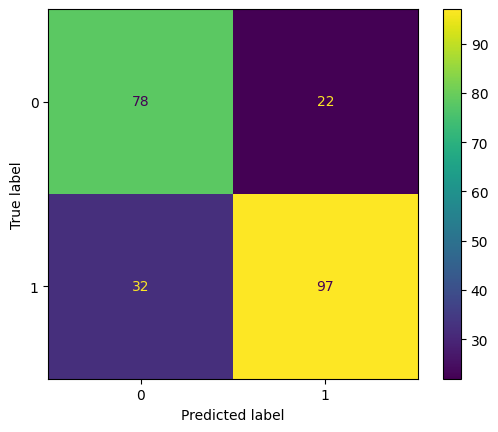

In [6]:
# Visulise the confusion matrix using ConfusionMatrixDisplay on the whole datset by aggregating the results of the k fold cross validation
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Logistic Regression
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Low Quality', 'High Quality'])
print('Logistic Regression Confusion Matrix')
cmd.plot()

SVM Confusion Matrix


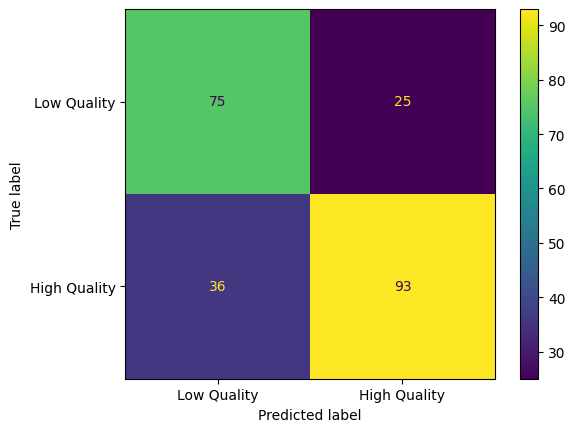

In [5]:
# SVM
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Low Quality', 'High Quality'])
print('SVM Confusion Matrix')
cmd.plot()